# **KNN, Naive Bayes, Decision tree**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report)
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns

Dataset

In [2]:
df = pd.read_csv('50_Startups.csv')
print("Original Dataset Shape:", df.shape)
print("\nFirst 5 Rows:")
print(df.head())

Original Dataset Shape: (50, 5)

First 5 Rows:
   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


DATA PROCESSING


Convert profit to binary class
(1 if profit > 100000 else 0)

In [3]:
df['Profit_Class'] = np.where(df['Profit'] > 100000, 1, 0)

seperate features and target

In [4]:
X = df.drop(['Profit', 'Profit_Class'], axis=1)
y = df['Profit_Class']

ONe-Hot encoding

In [5]:
categorical_col = ['State']
numerical_cols = ['R&D Spend', 'Administration', 'Marketing Spend']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_col)
    ])

X_processed = preprocessor.fit_transform(X)
print("\nProcessed Features Shape:", X_processed.shape)



Processed Features Shape: (50, 5)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42)

KNN Model

In [7]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

Naive bayes model

In [9]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

Decision Tree model

In [10]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

Comparison

In [13]:
def evaluate_model(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    print(f"\n{name} Results:")
    print(f"Accuracy: {acc:.2%}")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(classification_report(y_true, y_pred))


    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.show()


KNN Results:
Accuracy: 80.00%
Confusion Matrix:
[[4 2]
 [1 8]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.80      0.89      0.84         9

    accuracy                           0.80        15
   macro avg       0.80      0.78      0.78        15
weighted avg       0.80      0.80      0.80        15



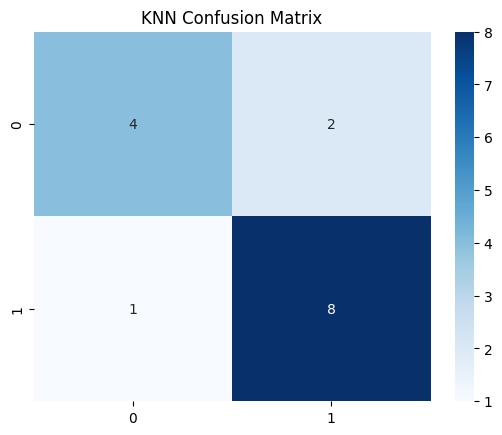

In [15]:
evaluate_model("KNN", y_test, y_pred_knn)


Naive Bayes Results:
Accuracy: 93.33%
Confusion Matrix:
[[6 0]
 [1 8]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.89      0.94         9

    accuracy                           0.93        15
   macro avg       0.93      0.94      0.93        15
weighted avg       0.94      0.93      0.93        15



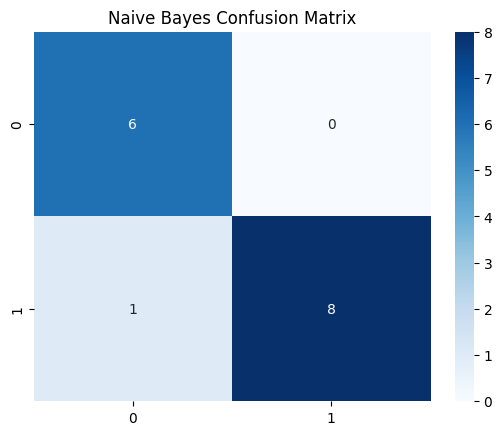

In [16]:
evaluate_model("Naive Bayes", y_test, y_pred_nb)


Decision Tree Results:
Accuracy: 93.33%
Confusion Matrix:
[[5 1]
 [0 9]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.90      1.00      0.95         9

    accuracy                           0.93        15
   macro avg       0.95      0.92      0.93        15
weighted avg       0.94      0.93      0.93        15



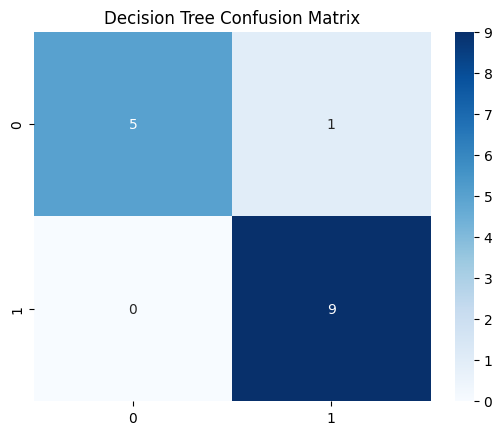

In [17]:
evaluate_model("Decision Tree", y_test, y_pred_dt)

prediction

In [19]:
sample_data = pd.DataFrame({
    'R&D Spend': [100000],
    'Administration': [120000],
    'Marketing Spend': [300000],
    'State': ['California']
})

sample_processed = preprocessor.transform(sample_data)
print("\nSample Prediction:")
print("KNN:", knn.predict(sample_processed))
print("Naive Bayes:", nb.predict(sample_processed))
print("Decision Tree:", dt.predict(sample_processed))



Sample Prediction:
KNN: [1]
Naive Bayes: [1]
Decision Tree: [1]


Decision tree

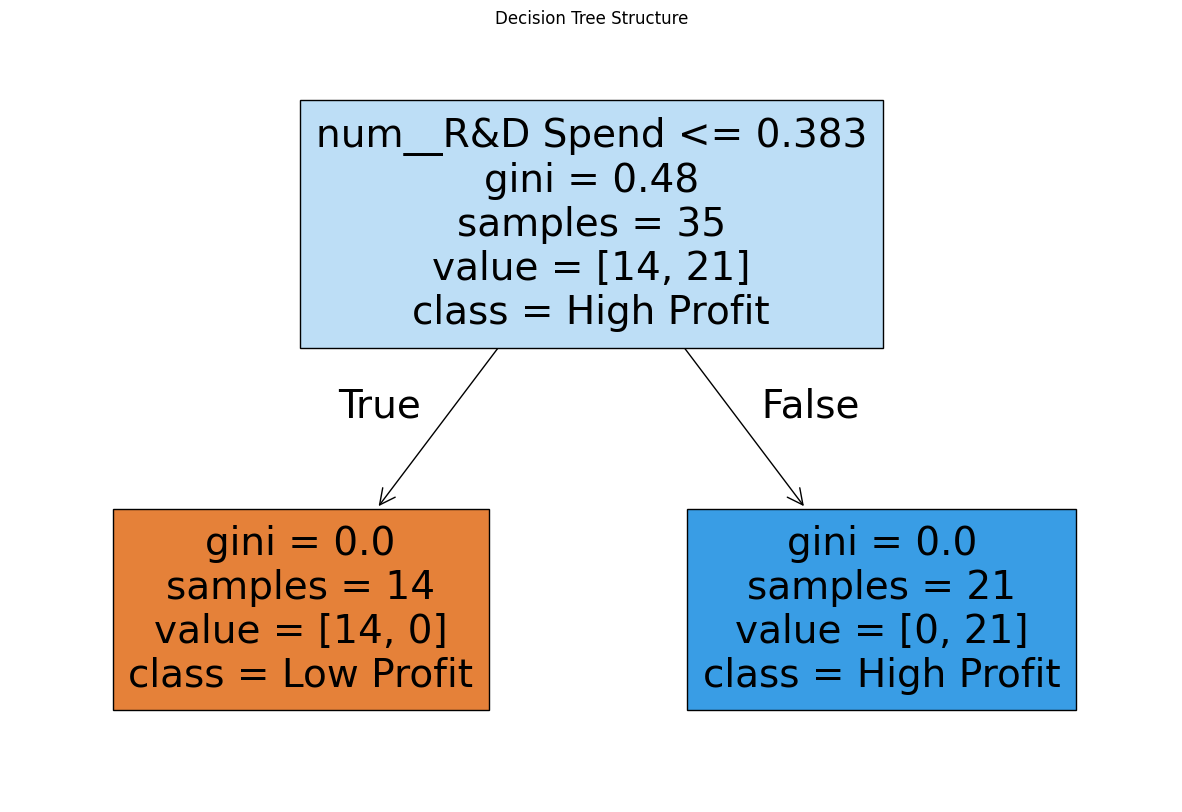

In [20]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15,10))
plot_tree(dt, filled=True,
          feature_names=preprocessor.get_feature_names_out(),
          class_names=['Low Profit', 'High Profit'])
plt.title("Decision Tree Structure")
plt.show()